# Validating the method of fundamental solutions for computing the total scattering cross-section

### Arnold D. Kim
*Department of Applied Mathematics, University of California, Merced*

In [1]:
import  time
print( 'Last updated: %s' %time.strftime('%d/%m/%Y') )

Last updated: 31/05/2020


In [2]:
# defaults for the codes below

import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

## Overview

In this notebook, we compute the total scattering cross-section using the method of fundamental solutions and by a truncation of the analytical solution, and compare the results. This study is used for validating the model presented in the paper entitled, "Modeling broadband cloaking using 3D nano-assembled plasmonic meta structures," by M. Khan, S. Ghosh, R. Baxter, and A. D. Kim (2020).

## 1 Problem description

A wave with wavelength $\lambda$ is incident on a
structure consisting of a sphere with radius $a$. 
Suppose that the origin of a coordinate system lies at the center of
the sphere. We denote the interior domain by
$D = \{ r < a \}$ and the exterior domain by $E = \{ r > a \}$. The
spherical surface $B = \{ r = a \}$ is interface between the interior
and exterior. The wave field in the interior is denoted by
$\psi^{\text{int}}$ and satisfies the homogeneous reduced wave or
Helmholtz equation,
\begin{equation}
  \left( \nabla^{2} + k_{1}^{2} \right) \psi^{\text{int}}
  = 0, \quad \text{in $D$},
  \label{eq:interiorDE}
\end{equation}
with $k_{1}$ denoting the wavenumber for the dielectric sphere. The
wave field in the exterior is denoted by $\psi^{\text{ext}}$ and
satisfies
\begin{equation}
  \left( \nabla^{2} + k_{0}^{2} \right) \psi^{\text{ext}}
  = 0, \quad
  \text{in $E$}.
  \label{eq:exteriorDE}
\end{equation}
Here, $k_{0}$ is the wavenumber for the exterior. We write $\psi^{\text{ext}}$ as the sum
\begin{equation}
  \psi^{\text{ext}} = \psi^{\text{inc}} + \psi^{s}
\end{equation}
with $\psi^{\text{inc}}$ denoting the incident field 
and $\psi^{\text{s}}$ denoting the scattered field.

We must supplement the equations above with conditions on $B$ as well
as radiation conditions. We prescribe that
\begin{gather}
  \psi^{\text{int}} = \psi^{\text{inc}} + \psi^{\text{s}} \quad
  \text{on $B$},
  \label{eq:BC1}
\end{gather}
and
\begin{gather}
  \partial_{\nu} \psi^{\text{int}} = \partial_{\nu} \psi^{\text{inc}}
  + \partial_{\nu} \psi^{\text{s}} \quad \text{on $B$},
  \label{eq:BC2}
\end{gather}
with $\partial_{\nu}$ denoting the derivative along the normal on $B$
pointing into $E$. Additionally, we require that $\psi^{s}$ satisfies
the Sommerfeld radiation condition. The differential equations supplemented by the interface conditions, 
and the requirement that $\psi^{\text{s}}$ satisfies the Sommerfeld radiation condition
constitute a complete mathematical description of the problem.

## 2 Exact solution as an expansion in Legendre polynomials

Suppose $\psi^{\text{inc}} = e^{\mathrm{i} k_{0} \hat{z} \cdot \mathbf{r}}$ corresponding to a plane wave propagating in the $+\hat{z}$ direction. Because the scatterer is a sphere centered at the origin, this problem is invariant under azimuthal rotations about the $z$-axis. It follows that this problem only depends on the radius and the cosine of the polar angle, which we denote here by $\mu = \cos\theta$. We consider this azimuthal symmetry below.

The spherical harmonics are given by
\begin{equation}
  Y_{nm}(\mu,\varphi) = \sqrt{\frac{2n+1}{4\pi} \frac{(n-m)!}{(n+m)!}} P_{n}^{|m|}(\mu) e^{\mathrm{i} m \varphi}.
\end{equation}
They satisfy the orthogonality relation,
\begin{equation}
   \int_{-\pi}^{\pi} \int_{-1}^{1} Y^{\ast}_{n'm'}(\mu,\varphi) Y_{nm}(\mu,\varphi) \mathrm{d}\mu \mathrm{d}\varphi = \delta_{n,n'} \delta_{m,m'}.
\end{equation}
The interior field is given by the following expansion in spherical harmonics,
\begin{equation}
   \psi^{\text{int}}(r,\mu) = \sum_{n = 0}^{\infty} j_{n}(k_{1} r) \sum_{m = -n}^{n} Y_{nm}(\mu,\varphi) a_{mn},
\end{equation}
with $j_{n}$ denoting the spherical Bessel function. The scattered field is given by the following expansion in spherical harmonics,
\begin{equation}
   \psi^{s}(r,\mu) = \sum_{n = 0}^{\infty} h^{(1)}_{n}(k_{0} r) \sum_{m = -n}^{n} Y_{nm}(\mu,\varphi) b_{mn},
\end{equation}
with $h_{n}^{(1)}$ denoting the spherical Hankel function of the first kind. The expansion coefficients, $a_{nm}$, and $b_{nm}$ remain to be determined. 

Now, we consider the incident plane wave propagating in the $+\hat{z}$ direction. Let
\begin{equation}
   e^{\mathrm{i} k_{0} a \mu} = \sum_{n = 0}^{\infty} \sum_{m = -n}^{n} Y_{nm}(\mu,\varphi) c_{nm},
\end{equation}
and
\begin{equation}
  \mathrm{i} k_{0} \mu e^{\mathrm{i} k_{0} a \mu} = \sum_{n = 0}^{\infty} \sum_{m = -n}^{n} Y_{nm}(\mu,\varphi) d_{nm}.
\end{equation}
By the orthogonality of the spherical harmonics, we find that
\begin{equation}
   c_{nm} = \int_{-\pi}^{\pi} \int_{-1}^{1} Y^{\ast}_{nm}(\mu,\varphi) e^{\mathrm{i} k_{0} a_{0} \mu} \mathrm{d}\mu \mathrm{d}\varphi,
\end{equation}
and
\begin{equation}
   d_{nm} = \int_{-\pi}^{\pi} \int_{-1}^{1} Y^{\ast}_{nm}(\mu,\varphi) \mathrm{i} k_{0} \mu e^{\mathrm{i} k_{0} a_{0} \mu} \mathrm{d}\mu \mathrm{d}\varphi,
\end{equation}
Because
\begin{equation}
   \int_{-\pi}^{\pi} Y^{\ast}_{nm}(\mu,\varphi) \mathrm{d}\varphi = \sqrt{2 \pi} \sqrt{\frac{2n+1}{2}} 
   P_{n}(\mu) \delta_{m,0},
\end{equation}
we find that $c_{nm} = C_{n} \delta_{m,0}$ with
\begin{equation}
   C_{n} = \sqrt{2 \pi} \int_{-1}^{1} e^{\mathrm{i} k_{0} a_{0} \mu} \sqrt{\frac{2n+1}{2}} P_{n}(\mu) \mathrm{d}\mu,
\end{equation}
and $d_{nm} = D_{n} \delta_{m,0}$ with
\begin{equation}
   D_{n} = \sqrt{2 \pi} \int_{-1}^{1} \mathrm{i} k_{0} \mu e^{\mathrm{i} k_{0} a_{0} \mu} \sqrt{\frac{2n+1}{2}} P_{n}(\mu) \mathrm{d}\mu.
\end{equation}

By substituting these expansions into the boundary conditions and projecting onto the spherical harmonics, we find that
\begin{equation}
    a_{nm} j_{n}(k_{1} a) = b_{nm} h_{n}^{(1)}(k_{0} a) + C_{n} \delta_{m,0}, \quad n = 0, 1, \cdots, \quad m = -n, \cdots, n,
\end{equation}
and 
\begin{equation}
   a_{nm} \partial_{r} j_{n}(k_{1} a) = b_{nm} \partial_{r} h_{n}^{(1)}(k_{0} a) + D_{n} \delta_{m,0}, \quad n = 0, 1, \cdots, \quad m = -n, \cdots, n.
\end{equation}
Thus, we find that $a_{mn} = A_{n} \delta_{m,0}$ and $b_{mn} = B_{n} \delta_{m,0}$.

In the code that follows, we perform the following procedure.
1. Compute $C_{n}$ and $D_{n}$ using Gauss-Legendre quadrature for $n = 0, \cdots, N-1$.
2. Construct and solve the linear system of equations for $A_{n}$ and $B_{n}$ for $n = 0, \cdots, N-1$.
3. Use these results to compute the scattering cross-section.

### 2.1 Gauss-Legendre quadrature

To determine the expansion coefficients, $C_{n}$ and $D_{n}$, we make use of the orthogonality relation for Legendre polynomials,
\begin{equation}
   \frac{2n + 1}{2} \int_{-1}^{1} P_{n}(\mu) P_{n'}(\mu) \mathrm{d}\mu = \delta_{n,n'}.
\end{equation}
Thus, we determine that
\begin{equation}
   C_{n} = \sqrt{2\pi} \int_{-1}^{1} e^{\mathrm{i} k_{0} a \mu} \sqrt{\frac{2n+1}{2}} P_{n}(\mu) \mathrm{d}\mu,
\end{equation}
and
\begin{equation}
   D_{n} = \sqrt{2\pi} \int_{-1}^{1} \mathrm{i} k_{0} \mu e^{\mathrm{i} k_{0} a \mu} \sqrt{\frac{2n+1}{2}} P_{n}(\mu) \mathrm{d}\mu.
\end{equation}
In light of these expressions, we normalize each Legendre polynomial by $\sqrt{(2n+1)/2}$ so that we do not have to incorporate this factor explicitly in the computations that follow.

To compute the integrals above, we use the Gauss-Legendre quadrature rule,
\begin{equation}
   \int_{-1}^{1} f(\mu) \mathrm{d}\mu \approx \sum_{j = 1}^{N} f(\mu_{j}) w_{j},
\end{equation}
with $\mu_{j}$ and $w_{j}$ denoting the quadrature abscissas and weights, respectively. This quadrature rule is exact for integrating polynomials of degree $2N - 1$.

We compute the Legendre polynomials using $P_{0}(\mu) = 1$, $P_{1}(\mu) = \mu$, and the recursion relation,
\begin{equation}
   P_{n+1}(\mu) = \frac{(2n+1) \mu P_{n}(\mu) - n P_{n-1}(\mu)}{n+1}, \quad n = 2, 3, \cdots,
\end{equation}
and then normalize them by multiplying by $\sqrt{(2n+1)/2}$.

The code below calls the Gauss-Legendre quadrature rule and uses that quadrature rule to compute the *normalized* Legendre polynomials used for the computations that follow.

In [3]:
def ComputeLegendrePolynomials( N ):
    
    # compute the Gauss-Legendre quadrature rule

    mu, wt = np.polynomial.legendre.leggauss( N )

    # compute the matrix of Legendre polynomials

    Pn = np.ones( ( N, N ), dtype = 'complex' )
    Pn[:,1] = mu

    for n in range( 1, N - 1 ):
    
        Pn[:,n+1] = ( ( 2 * n + 1 ) * mu * Pn[:,n] - n * Pn[:,n-1] ) / ( n + 1 )
    
    # normalize the Legendre polynomials

    Pn = Pn @ np.diag( np.sqrt( ( 2 * np.arange(N) + 1 ) / 2 ) )
    
    return mu, wt, Pn;

### 2.2 Computing the total scattering cross-section using the analytical solution

We now compute the expansion coefficients by solving the $2 \times 2$ linear system resulting from substituting the Legendre expansions into the boundary conditions on $r = a$ leading to
\begin{equation}
    \begin{bmatrix} j_{n}(k_{1} a) & - h_{n}^{(1)}(k_{0} a) \\ k_{1} \partial_{r} j_{n}(k_{1} a) & -k_{0} \partial_{r} h_{n}^{(1)}(k_{0} a)\end{bmatrix} \begin{bmatrix} A_{n}\\ B_{n} \end{bmatrix} = \begin{bmatrix} C_{n} \\ D_{n} \end{bmatrix},
     \quad n = 0, 1, \cdots.
\end{equation}

The scattered field evaluated at distances far from the scattering
structure behaves like a spherical wave and is given by
\begin{equation}
  \psi^{\text{s}}(r) = f(\hat{o},\hat{\imath}) \frac{e^{\mathrm{i} k_{0}
      R}}{R}, \quad R > a^{2}/\lambda.
\end{equation}
Here, $f(\hat{o},\hat{\imath})$ is the scattering amplitude for the
scattered field in the far field in direction $\hat{o}$ when the
particle is illuminated by a plane wave propagating in direction
$\hat{\imath}$ with unit amplitude. Suppose we evaluate
$\psi^{\text{s}}$ at the point $R \hat{o}$ when $\psi^{\text{inc}}$ is
a plane wave of unit amplitude propagating in direction
$\hat{\imath}$. We compute this scattering amplitude through
evaluation of
\begin{equation}
  f(\hat{o},\hat{\imath}) = R e^{-\mathrm{i} k_{0} R}
  \psi^{\text{s}}(R \hat{o}).
\end{equation}
Substituting our approximation for the scattered field given in Section 2 into this expression, we
obtain
\begin{equation}
  f(\hat{o},\hat{\imath}) = R e^{-\mathrm{i} k_{0} R} \sum_{n = 0}^{\infty}  h^{(1)}_{n}( k_{0} R )
  \sqrt{\frac{2n+1}{4\pi}} P_{n}(\hat{o} \cdot \hat{i}) B_{n}.
\end{equation}
Next, we make use of the asymptotic behavior,
\begin{equation}
  h^{(1)}_{n}(k_{0} R) \sim e^{-\mathrm{i} (n+1) \pi/2} \frac{e^{\mathrm{i} k_{0} R}}{k_{0} R}, \quad R \to +\infty,
\end{equation}
to obtain
\begin{equation}
  f(\hat{o},\hat{\imath}) = \frac{1}{k_{0}} \sum_{n = 0}^{\infty}
  B_{n} e^{-\mathrm{i} (n+1) \pi/2} \sqrt{\frac{2n+1}{4 \pi}} P_{n}(\hat{o} \cdot \hat{i}).
\end{equation}

According to the Optical Theorem or forward scattering theorem, we can
compute the total cross section $\sigma_{t}$ of the scattering
structure through evaluation of
\begin{equation}
  \sigma_{t} = \frac{4\pi}{k_{0}}
  \text{Im}[f(\hat{\imath},\hat{\imath})].
\end{equation}
Hence, we can use our approximation for the scattering amplitude in the Optical Theorem to compute the total scattering cross section. 

This code computes the total scattering cross-section, $\sigma_{t}$ by explicitly computing the analytical solution derived using the method of separation of variables and evaluating the Optical Theorem. This code requires the wavenumbers outside $k_{0}$ and inside $k_{1}$ of the sphere, the sphere radius $a_{0}$, the Gauss-Legendre quadrature rule, and normalized Legendre polynomials.

In [4]:
def ComputeCrossSectionsAnalytical( k0, k1, a0, mu, wt, Pn, N ):

    # compute the expansion coefficients for the incident field

    Ψ_inc = np.exp( 1j * k0 * a0 * mu )
    C = np.sqrt( 2 * np.pi ) * Pn.T @ np.diag(wt) @ Ψ_inc

    # compute the expansion coefficients for the normal derivative of the incident field

    DnΨ_inc = 1j * k0 * mu * Ψ_inc
    D = np.sqrt( 2 * np.pi ) * Pn.T @ np.diag(wt) @ DnΨ_inc

    # allocate memory for the expansion coefficients
    
    B = np.full( ( N, 1 ), 'nan', dtype = 'complex' )
    
    # loop over all Legendre polynomials
    
    for n in range( N ):
    
        # compute the spherical Bessel functions needed
    
        a11 = sp.spherical_jn( n, k1 * a0, derivative = False )
        
        a21 = k1 * sp.spherical_jn( n, k1 * a0, derivative = True )
    
        a12 = - sp.spherical_jn( n, k0 * a0, derivative = False ) \
        - 1j * sp.spherical_yn( n, k0 * a0, derivative = False )
        
        a22 = - k0 * sp.spherical_jn( n, k0 * a0, derivative = True ) \
        - 1j * k0 * sp.spherical_yn( n, k0 * a0, derivative = True )
    
        # solve the 2 x 2 linear system for the expansion coefficients at index n
    
        Δ    = a11 * a22 - a12 * a21
        B[n] = ( a11 * D[n] - a21 * C[n] ) / Δ
        
    # compute the scattering amplitude
    
    fn = np.diag( np.exp( -1j * ( np.arange(N) + 1 ) * np.pi / 2 ) ) @ B / k0 / np.sqrt( 2 * np.pi )
    f  = Pn @ fn
       
    # compute the total cross-section using the Optical Theorem
    
    σ_t = 4 * np.pi / k0 * np.imag( np.sqrt( np.arange(N) + 0.5 ).T @ fn )
    
    return σ_t;

## 3 The method of fundamental solutions

To solve the scattering problem described above, we use the method of fundamental solutions which is as follows. 

Consider a set of $M$ points $r_{j}^{\text{int}} \in E$ for $j = 1, \cdots, M$ and form
the following approximation for the interior field,
\begin{equation}
  \psi^{\text{int}}(r) \cong \sum_{j = 1}^{M} c^{\text{int}}_{j} G_{1}(r -
  r^{\text{int}}_{j}), \quad r \in D.
\end{equation}
Here, $G_{1}$ is Green's function for the medium in the interior of the sphere.
Just as we have done for the interior field, we introduce the set of
$M$ points $r_{j}^{\text{ext}} \in D$ for $j = 1, \cdots, M$ and form the following approximation for the scattered field,
\begin{equation}
  \psi^{s}(r) \cong \sum_{j = 1}^{M} c_{j}^{s} G_{0}(r -
  r_{j}^{\text{ext}}).
\end{equation}
Here, $G_{0}$ is Green's function for the medium exterior to the sphere.

These approximations exactly solve the corresponding differential equations. Additionally, since the scattered field is given as a superposition of spherical waves, each satsifying the Sommerfeld radiation condition, this approximation also satisfes the Sommerfeld radiation condition. These expressions are approximate only because they approximately satisfy the boundary conditions. In fact, by requiring that these approximations satisfy the boundary conditions exactly on $M$ points on the sphere, we derive a linear system for the expansion coefficients, $c_{j}^{\text{int}}$ and $c_{j}^{s}$.


### 3.1 Define MFS points on the sphere

Here, we compute the points on $\rho^{\text{bdy}}_{i} \in B$ and the corresponding points $\rho^{\text{ext}}_{i} \in D$ and $\rho^{\text{int}}_{i} \in E$ for $i = 1, \cdots, M$ that will be used in the method of fundamental solutions. In particular, we compute the $M$ Fibonnaci lattice on the unit sphere, which gives our unit normals, $\nu_{i}$ for $i = 1, \cdots, M$. We set $\rho^{\text{bdy}}_{i} = a_{0} \nu_{i}$ for $i = 1, \cdots, M$ to set the points on the sphere of radius $a_{0}$. To compute $\rho^{\text{ext}}_{i} \in D$ for $i = 1, \cdots, M$, we set $\rho^{\text{ext}}_{i} = ( a_{0} - \ell ) \nu_{i}$. Similarly, to compute $\rho^{\text{int}}_{i} \in E$ for $i = 1, \cdots, M$, we set $\rho^{\text{int}}_{i} = ( a_{0} + \ell ) \nu_{i}$. The distance into $D$ and $E$ is set by the parameter $\ell$ in the code below. This function requires the sphere radius, $a_{0}$, and the number of Fibonnaci lattice points, $M$.

In [5]:
def ComputeMFSPoints( a0, M ):

    # allocate memory for the Fibonacci lattice points on the unit sphere

    ν = np.full( ( M, 3 ), float( 'nan' ) )

    # compute the "golden angle"

    golden_angle = np.pi * ( 3 - np.sqrt( 5 ) )

    # compute the points on the unit sphere

    ν[:,2] = ( 1 - 1 / M ) * ( 1 - 2 * np.arange( 0, M ) / ( M - 1 ) )

    ρ = np.sqrt( 1 - ν[:,2] ** 2 )
    θ = golden_angle * np.arange( 0, M )

    ν[:,0] = ρ * np.cos( θ )
    ν[:,1] = ρ * np.sin( θ )

    # compute the boundary points, interior points, and exterior points

    ℓ = 0.25 * a0

    ρ_bdy = a0 * ν
    ρ_int = ( a0 + ℓ ) * ν
    ρ_ext = ( a0 - ℓ ) * ν
    
    return ν, ρ_bdy, ρ_int, ρ_ext;

### 3.2 Define Green's function and its normal derivative

As stated above, we determine the expansion coefficients $c_{j}^{\text{int}}$ and $c_{j}^{s}$ by requiring that the approximations above exactly satisfy the boundary conditions at $M$ points on the boundary. By doing so, we obtain a linear system of equations for these unknown expansion coefficients. 

In what follows, we make use of Green's function for wavenumber $k$ given as
\begin{equation}
   G(r,r') = \frac{e^{\mathrm{i} k | r - r' |}}{4 \pi | r - r' |},
\end{equation}
and its normal derivative defined as
\begin{equation}
   \partial_{\nu} G(r,r') = \nu \cdot \nabla G(r,r') = \frac{\nu \cdot ( r - r' )}{|r - r'|} 
   \left( \mathrm{i} k - \frac{1}{|r - r'|} \right) \frac{e^{\mathrm{i} k | r - r' |}}{4 \pi | r - r' |}.
\end{equation}
Thus, we first define a function that computes $G$ and a function that computes $\partial_{\nu}G$ given the wavenumber, $k$, a matrix of $R_{d} = | r - r' |$ values, and a matrix of $\cos\Theta = \nu \cdot (r - r')/|r - r'|$ values.

In [6]:
def ComputeG( k, Rd ):
    
    # compute Green's function
    
    G = np.exp( 1j * k * Rd ) / ( 4 * np.pi * Rd )
      
    return G;

def ComputeDnG( k, Rd, CosTheta ):
    
    # compute Green's function
    
    G = ComputeG( k, Rd )
    
    # compute the normal derivative of Green's function
    
    DnG = CosTheta * ( 1j * k - 1 / Rd ) * G
    
    return DnG;

### 3.3 Compute the total scattering cross-section using the method of fundamental solutions

Next, we compute the MFS expansion coefficients satisfying the $2M \times 2M$ linear system resulting from substituting the approximations into the boundary condition for the field on $r = a_{0}$ yielding
\begin{equation}
   \sum_{j = 1}^{M} \left[ G_{1}( \rho^{\text{bdy}}_{i} - \rho^{\text{int}}_{j} ) c_{j}^{\text{int}} 
   - G_{0}( \rho^{\text{bdy}}_{i} - \rho^{\text{ext}}_{j} ) c_{j}^{s} \right] = \psi^{\text{inc}}(\rho^{\text{bdy}}_{i}), \quad i = 1, \cdots, M,
\end{equation}
and
\begin{equation}
   \sum_{j = 1}^{M} \left[ \partial_{\nu} G_{1}( \rho^{\text{bdy}}_{i} - \rho^{\text{int}}_{j} ) c_{j}^{\text{int}} 
   - \partial_{\nu} G_{0}( \rho^{\text{bdy}}_{i} - \rho^{\text{ext}}_{j} ) c_{j}^{s} \right] = \partial_{\nu} \psi^{\text{inc}}(\rho^{\text{bdy}}_{i}), \quad i = 1, \cdots, M.
\end{equation}
The code below computes the solution of this linear system given the wavenumbers $k_{0}$ outside and $k_{1}$ inside the sphere, the sphere radius, $a_{0}$, the unit normals, $\nu$, the MFS points: $\rho^{\text{bdy}}$, $\rho^{\text{int}}$, and $\rho^{\text{ext}}$, and the number of MFS points, $M$.

The scattered field evaluated at distances far from the scattering
structure behaves like a spherical wave and is given by
\begin{equation}
  \psi^{\text{s}}(r) = f(\hat{o},\hat{\imath}) \frac{e^{\mathrm{i} k_{0}
      R}}{R}, \quad R > a^{2}/\lambda.
\end{equation}
Here, $f(\hat{o},\hat{\imath})$ is the scattering amplitude for the
scattered field in the far field in direction $\hat{o}$ when the
particle is illuminated by a plane wave propagating in direction
$\hat{\imath}$ with unit amplitude. Suppose we evaluate
$\psi^{\text{s}}$ at the point $R \hat{o}$ when $\psi^{\text{inc}}$ is
a plane wave of unit amplitude propagating in direction
$\hat{\imath}$. We compute this scattering amplitude through
evaluation of
\begin{equation}
  f(\hat{o},\hat{\imath}) = R e^{-\mathrm{i} k_{0} R}
  \psi^{\text{s}}(R \hat{o}).
\end{equation}
Substituting our approximation for the scattered field given in Section 5 into this expression, we
obtain
\begin{equation}
  f(\hat{o},\hat{\imath}) \cong \sum_{j = 1}^{M}
  c_{j}^{s} R e^{-\mathrm{i} k_{0} R} G_{0}(R \hat{o} -
  r_{j}^{\text{ext}}).
\end{equation}
Next, we make use of
\begin{equation}
  | R \hat{o} - r' | = \left( R^{2} + |r'|^{2} - 2 R \hat{o} \cdot r'
  \right)^{1/2} \sim R - \hat{o} \cdot r', \quad R \to +\infty,
\end{equation}
to write the far-field Green's function,
\begin{equation}
  G_{0}( R \hat{o} - r' ) \sim e^{-\mathrm{i}
    k_{0} \hat{o} \cdot r'} \frac{e^{\mathrm{i} k_{0} R}}{4 \pi R},
  \quad R \to +\infty.
  \label{eq:farfieldGreens}
\end{equation}
Replacing $G_{0}$ in the scattering amplitude equation by this far-field Green's function, we obtain
\begin{equation}
  f(\hat{o},\hat{\imath}) \cong \frac{1}{4\pi} \sum_{j = 1}^{M}
  c_{j}^{s} e^{-\mathrm{i} k_{0} \hat{o}
    \cdot r_{j}^{\text{ext}}}.
\end{equation}

According to the Optical Theorem or forward scattering theorem, we can
compute the total cross section $\sigma_{t}$ of the scattering
structure through evaluation of
\begin{equation}
  \sigma_{t} = \frac{4\pi}{k_{0}}
  \text{Im}[f(\hat{\imath},\hat{\imath})].
\end{equation}
Hence, we can use our approximation for the scattering amplitude in the Optical Theorem to compute the total scattering cross section. The code below evaluates the Optical Theorem using the MFS approximation for the scattered field. It requires the wavenumbers $k_{0}$ outside and $k_{1}$ inside the sphere, the sphere radius, $a_{0}$, the unit normals, $\nu$, the MFS points: $\rho^{\text{bdy}}$, $\rho^{\text{int}}$, and $\rho^{\text{ext}}$, and the number of MFS points, $M$.

This code computes the total scattering cross-section, $\sigma_{t}$ by using the method of fundamental solutions. This code requires the wavenumbers outside $k_{0}$ and inside $k_{1}$ of the sphere, the sphere radius $a_{0}$, the method of fundamental solution boundary normals and points.

In [7]:
def ComputeSigmaTMFS( k0, k1, a0, ν, ρ_bdy, ρ_int, ρ_ext, M ):

    # compute a mesh grid of indices to compute the matrices below

    indx, jndx = np.meshgrid( np.arange(0,M), np.arange(0,M) )

    # interior points

    R_int = np.sqrt( ( ( ρ_bdy[indx] - ρ_int[jndx] ) ** 2 ).sum( axis = 2 ) )
    μ_int = ( ν[indx] * ( ρ_bdy[indx] - ρ_int[jndx] ) ).sum( axis = 2 ) / R_int

    # exterior points

    R_ext = np.sqrt( ( ( ρ_bdy[indx] - ρ_ext[jndx] ) ** 2 ).sum( axis = 2 ) )
    μ_ext = ( ν[indx] * ( ρ_bdy[indx] - ρ_ext[jndx] ) ).sum( axis = 2 ) / R_ext
        
    # compute the incident field and its normal derivative on the M boundary points
    
    Ψ_inc   = np.exp( 1j * k0 * ρ_bdy[:,2] )
    DnΨ_inc = 1j * k0 * np.multiply( ν[:,2], Ψ_inc )
    
    # compute the matrix blocks
    
    A11 =  ComputeG( k1, R_int )
    A12 = -ComputeG( k0, R_ext ) 
    
    A21 =  ComputeDnG( k1, R_int, μ_int )
    A22 = -ComputeDnG( k0, R_ext, μ_ext )
    
    # form the linear system of equations
    
    A = np.block( [ [ A11, A12 ], [ A21, A22 ] ] )
    b = np.block( [ Ψ_inc, DnΨ_inc ] )
    
    A.shape
    
    # solve the linear system
    
    c = np.linalg.solve( A, b )
    
    # compute the scattering amplitude
    
    f = 0.25 / np.pi * np.exp( -1j * k0 * ρ_ext[:,2] ).T @ c[M:2*M]
    
    # compute the scattering cross-section
    
    σ_t = 4 * np.pi * np.imag( f ) / k0
    
    return σ_t;

## 4 Comparison of the exact and MFS solutions

We now use the functions defined above to compute the total scattering cross-section using the analytical and MFS solutions and compare those results. For the analytical solution, we use the first $64$ terms of the Legendre expansion. For the MFS solution, we use $512$ discrete source points.

In [8]:
# set the radius of the sphere (in nanometers)

a0 = 750.0 / 2.0

# compute the geometrical cross-section

σ_g = np.pi * a0 ** 2

# compute the wavelengths

Nλ = 37
λ  = np.linspace( 380, 740, Nλ )

# set the refractive indices

refindx_int = 1.40
refindx_ext = 1.00

# set the order of the Legendre polynomial expansion

N = 64

# compute the Gauss-Legendre quadrature rule and Legendre polynomials

mu, wt, Pn = ComputeLegendrePolynomials( N )

# set the number of MFS points

M = 512

# compute the MFS points

ν, ρ_bdy, ρ_int, ρ_ext = ComputeMFSPoints( a0, M )

# allocate memory for the total cross-sections

σ_t_analytical = np.full( ( Nλ, 1 ), 'nan', dtype = 'float' )
σ_t_MFS        = np.full( ( Nλ, 1 ), 'nan', dtype = 'float' )

# loop over all wavelengths

for nλ in range( Nλ ):
    
    # compute the wavenumbers
    
    k0 = 2 * np.pi / λ[nλ] * refindx_ext
    k1 = 2 * np.pi / λ[nλ] * refindx_int
    
    # compute the analytical result
    
    σ_t_analytical[nλ] = ComputeCrossSectionsAnalytical( k0, k1, a0, mu, wt, Pn, N )
    
    # compute the MFS result
    
    σ_t_MFS[nλ] = ComputeSigmaTMFS( k0, k1, a0, ν, ρ_bdy, ρ_int, ρ_ext, M )

### 4.1 Plot the scattering efficiency

The scattering efficiency, $\sigma_{E} = \sigma_{t}/\sigma_{g}$ with $\sigma_{g} = \pi d^2/4$ denoting the geometric cross-section of the sphere. In the code below, we plot the two results we have computed to compare them.

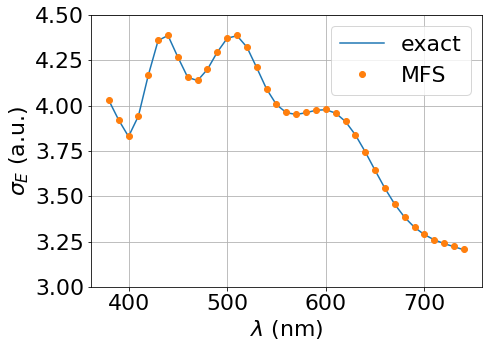

In [9]:
plt.rcParams['figure.figsize'] = [7,5]
plt.rcParams.update({'font.size': 22})

plt.plot( λ, σ_t_analytical / σ_g, λ, σ_t_MFS / σ_g, 'o' )
plt.ylim( (3.0, 4.5) )
plt.xlabel( r'$\lambda$ (nm)' )
plt.ylabel( r'$\sigma_{E}$ (a.u.)' )
plt.legend( ( 'exact', 'MFS' ) )
plt.grid()

plt.show()

### Plot the relative error

We compute the relative error defined according to $| \text{exact} - \text{MFS} | / | \text{exact} |$.

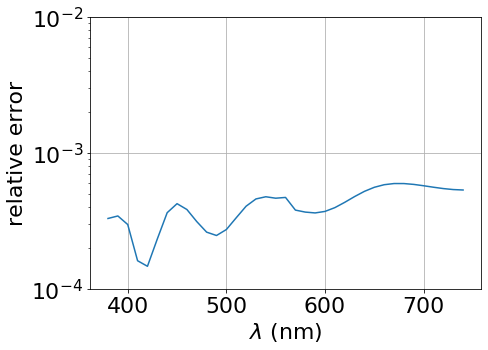

In [13]:
plt.rcParams['figure.figsize'] = [7,5]
plt.rcParams.update({'font.size': 22})

plt.semilogy( λ, abs( σ_t_analytical / σ_g - σ_t_MFS / σ_g ) / abs( σ_t_analytical / σ_g ) )
plt.ylim( (1e-4,1e-2) )
plt.xlabel( r'$\lambda$ (nm)' )
plt.ylabel( 'relative error' )
plt.grid()

plt.show()